> Nama: Fachrul Firmansyah \
> Username: fachrulfirman \
> Email: fachrulfirman@yahoo.com \
> Dataset: Emotion Detection from Text \
> Link Dataset: https://www.kaggle.com/pashupatigupta/emotion-detection-from-text

In [61]:
# Import library yang diperlukan
import pandas as pd

import nltk, re, string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
# Membaca dataset yang telah dipilih
df = pd.read_csv('/content/tweet_emotions.csv')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [63]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [64]:
# Menghitung jumlah data berdasarkan sentiment-nya 
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [65]:
# Menghapus kolom yang tidak diperlukan
df_text = df.drop(columns=['tweet_id'])
df_text

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [66]:
# Mengubah huruf menjadi huruf kecil semua
df_text.content = df_text.content.apply(lambda x: x.lower())

In [67]:
# Menghapus angka
def removeNumb(text):
  return re.sub('[0-9]+',' ',text)

df_text.content = df_text.content.apply(removeNumb)

In [68]:
# Menghapus tanda baca
def removePunc(text):
  return(text.translate(str.maketrans(' ',' ',string.punctuation)))

df_text.content = df_text.content.apply(removePunc)

In [69]:
# Menghapus kata umum yang tidak memiliki makna
st_words = stopwords.words()
def stopword(text):
  return(' '.join([w for w in text.split() if w not in st_words]))
  
df_text.content = df_text.content.apply(lambda x: stopword(x)) 

In [70]:
# Melakukan reduksi kata
lemmatizer = WordNetLemmatizer()
def lem(text):
  pos_dict = {'N': wordnet.NOUN,'V': wordnet.VERB,'J': wordnet.ADJ,'R': wordnet.ADV}
  return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t,wordnet.NOUN)) for w,t in nltk.pos_tag(text.split())]))

df_text.content = df_text.content.apply(lambda x: lem(x))

In [71]:
df_text

,sentiment,content
0,empty,tiffanylue know listenin bad habit earlier sta...
1,sadness,layin bed headache ughhhhwaitin call
2,sadness,funeral ceremonygloomy friday
3,enthusiasm,want hang friend soon
4,neutral,dannycastillo trade someone houston ticket
...,...,...
39995,neutral,johnlloydtaylor
39996,love,happy mother day love
39997,love,happy mother day mommy woman long youre momma ...
39998,happiness,niariley wassup beautiful follow peep new hit ...


In [72]:
sentiment = pd.get_dummies(df_text.sentiment)
df_text_sentiment = pd.concat([df_text,sentiment],axis=1).drop(columns='sentiment')
df_text_sentiment

,content,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
0,tiffanylue know listenin bad habit earlier sta...,0,0,1,0,0,0,0,0,0,0,0,0,0
1,layin bed headache ughhhhwaitin call,0,0,0,0,0,0,0,0,0,0,1,0,0
2,funeral ceremonygloomy friday,0,0,0,0,0,0,0,0,0,0,1,0,0
3,want hang friend soon,0,0,0,1,0,0,0,0,0,0,0,0,0
4,dannycastillo trade someone houston ticket,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,johnlloydtaylor,0,0,0,0,0,0,0,0,1,0,0,0,0
39996,happy mother day love,0,0,0,0,0,0,0,1,0,0,0,0,0
39997,happy mother day mommy woman long youre momma ...,0,0,0,0,0,0,0,1,0,0,0,0,0
39998,niariley wassup beautiful follow peep new hit ...,0,0,0,0,0,1,0,0,0,0,0,0,0


In [73]:
tweet = df_text_sentiment['content'].values
emotions = df_text_sentiment[['anger','boredom','empty','enthusiasm','fun','happiness','hate','love','neutral','relief','sadness','surprise','worry']].values

In [74]:
tweet

array(['tiffanylue know listenin bad habit earlier started freakin part',
       'layin bed headache ughhhhwaitin call',
       'funeral ceremonygloomy friday', ...,
       'happy mother day mommy woman long youre momma someone day',
       'niariley wassup beautiful follow peep new hit single wwwmyspacecomipsohot def video',
       'mopedronin bullet train tokyo gf visiting japan since thursday vacationsightseeing gaijin godzilla'],
      dtype=object)

In [75]:
emotions

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [76]:
# Split data dan tokenizer
tweet_train, tweet_test, emotions_train, emotions_test = train_test_split(tweet, emotions, test_size=0.2, shuffle=True)

tokenizer = Tokenizer(num_words=5000, filters='!"#$&()*+,-./:;<=>@[\]^_`{|}~')
tokenizer.fit_on_texts(tweet_train)
tokenizer.fit_on_texts(tweet_test)

sekuens_train = tokenizer.texts_to_sequences(tweet_train)
sekuens_test = tokenizer.texts_to_sequences(tweet_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [77]:
# Membuat model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=80000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(13, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          1280000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 13)                845       
Total params: 1,318,157
Trainable params: 1,318,157
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Membuat callback
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.9):
      self.model.stop_training = True
      print('Akurasi training set telah berada di atas 90%')
callbacks = Callback()

In [79]:
history = model.fit(padded_train, emotions_train,
                    epochs=100, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[callbacks])

Epoch 1/100
800/800 [==============================] - 22s 26ms/step - loss: 2.1041 - accuracy: 0.2521 - val_loss: 1.9915 - val_accuracy: 0.3170
Epoch 2/100
800/800 [==============================] - 20s 25ms/step - loss: 1.9076 - accuracy: 0.3502 - val_loss: 1.9383 - val_accuracy: 0.3450
Epoch 3/100
800/800 [==============================] - 20s 25ms/step - loss: 1.8052 - accuracy: 0.3926 - val_loss: 1.9516 - val_accuracy: 0.3417
Epoch 4/100
800/800 [==============================] - 20s 25ms/step - loss: 1.7262 - accuracy: 0.4211 - val_loss: 1.9988 - val_accuracy: 0.3338
Epoch 5/100
800/800 [==============================] - 20s 25ms/step - loss: 1.6632 - accuracy: 0.4464 - val_loss: 2.0516 - val_accuracy: 0.3294
Epoch 6/100
800/800 [==============================] - 20s 25ms/step - loss: 1.6087 - accuracy: 0.4621 - val_loss: 2.0789 - val_accuracy: 0.3253
Epoch 7/100
800/800 [==============================] - 20s 25ms/step - loss: 1.5493 - accuracy: 0.4815 - val_loss: 2.1811 - val_ac

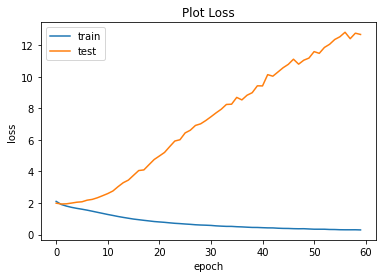

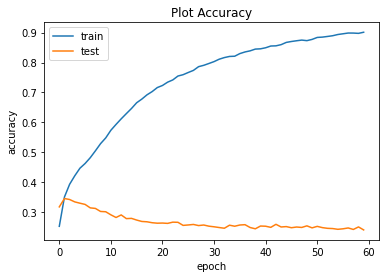

In [80]:
# Membuat plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Membuat plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plot Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()